In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
jobs = pd.read_csv('Data/Jadarat_data.csv')

In [3]:
pd.set_option('display.max_columns', None)

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [4]:
jobs.head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0 Years,both


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [ ]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1470 non-null   object
 1   job_date      1470 non-null   object
 2   job_desc      1470 non-null   object
 3   job_tasks     1470 non-null   object
 4   comp_name     1470 non-null   object
 5   comp_no       1470 non-null   object
 6   comp_type     1470 non-null   object
 7   comp_size     1456 non-null   object
 8   eco_activity  1380 non-null   object
 9   qualif        780 non-null    object
 10  region        1470 non-null   object
 11  city          1470 non-null   object
 12  benefits      1470 non-null   object
 13  contract      1470 non-null   object
 14  positions     1470 non-null   object
 15  job_post_id   1470 non-null   int64 
 16  exper         1470 non-null   object
 17  gender        1470 non-null   object
dtypes: int64(1), object(17)
memory usage: 206.8+ KB


In [6]:
jobs.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

In [7]:
jobs.describe(include='object')

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,exper,gender
count,1470,1470,1470,1470,1470,1470,1470,1456,1380,780,1470,1470,1470,1470,1470,1470,1470
unique,324,92,438,444,886,894,2,7,361,615,14,114,393,2,25,6,3
top,بائع,Publish date,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركه العرض المتقن للخدمات التجارية شركة مساهمة...,1-169123,خاص,صغيرة فئة ب,المطاعم مع الخدمة,"['Language data', 'الانجليزية', 'متوسط']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 1,0 Years,both
freq,98,47,93,90,16,16,1465,635,65,28,622,523,449,1448,853,833,587


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [8]:
# The dataset originates from Jadarat, Saudi Arabia's unified national employment platform, ensuring its reliability and credibility.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [9]:
# The dataset represents job listings from the year 1444 Hijri, based on the most recent update and listing dates.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [10]:
# The dataset maintains consistency, with values and formats aligned across all columns.

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [11]:
# The dataset is relevant for the analysis as it aligns with the problem statement, which focuses on understanding the job landscape in Saudi Arabia. Additionally, all columns in the dataset are relevant, and no deletions are necessary.

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [12]:
jobs.duplicated().sum()

np.int64(1)

In [72]:
# went to data cleaning to handle the duplicated values

In [73]:
jobs.duplicated().sum()

np.int64(42)

In [74]:
jobs[jobs.duplicated(keep=False)].sort_values(by=['job_post_id']).head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,contract,job_post_id,exper,gender,positions_filled,positions_available,gregorian_date,salary,benefits
923,مندوب مشتريات,04/06/1444,شراء المواد والسلع عن طريق الشراء المباشر، وشر...,دراسة طلبات الشراء في الجهة المعنية وتدقيقه...,شركة بشار محمد قطامش للمقاولات شركة الشخص الواحد,1-228552,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزية', 'متوسط']",الرياض,AR RIYADH,دوام كامل,20202026373225,0,both,0,1,2022-12-28,4000.0,Not Specified
1158,مندوب مشتريات,04/06/1444,شراء المواد والسلع عن طريق الشراء المباشر، وشر...,دراسة طلبات الشراء في الجهة المعنية وتدقيقه...,شركة بشار محمد قطامش للمقاولات شركة الشخص الواحد,1-228552,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزية', 'متوسط']",الرياض,AR RIYADH,دوام كامل,20202026373225,0,both,0,1,2022-12-28,4000.0,Not Specified
1156,نادل,06/06/1444,استقبال العملاء وتزويدهم بقوائم الاطعمة والمشر...,استقبال العملاء وتزويدهم بقوائم الأطعمة وال...,شركة التجارب العصريه التجارية,1-2335823,خاص,صغيرة فئة ب,المطاعم مع الخدمة,"['Language data', 'انجليزي', 'محترف']",الرياض,AR RIYADH,دوام كامل,20202026373677,0,M,0,2,2022-12-30,5000.0,وجبات موظفين
921,نادل,06/06/1444,استقبال العملاء وتزويدهم بقوائم الاطعمة والمشر...,استقبال العملاء وتزويدهم بقوائم الأطعمة وال...,شركة التجارب العصريه التجارية,1-2335823,خاص,صغيرة فئة ب,المطاعم مع الخدمة,"['Language data', 'انجليزي', 'محترف']",الرياض,AR RIYADH,دوام كامل,20202026373677,0,M,0,2,2022-12-30,5000.0,وجبات موظفين
920,رئيس تنفيذي,04/06/1444,المشاركة في وضع الأهداف والخطط الإستراتيجية وا...,المشاركة في وضع الإستراتيجية العامة وتحقيقه...,شركة أركان البيوت العقارية,34-1951749,خاص,صغيرة فئة ب,شراء وبيع الاراضى والعقارات وتقسيمها وأنشطة ال...,"['Language data', 'العربيه', 'محترف', 'انجليزي...",مكة المكرمة,JEDDAH,دوام كامل,20202026373876,2,both,0,2,2022-12-28,6000.0,Not Specified


In [75]:
# After filling missing values, some job postings became exact duplicates (including the same job_post_id).
# We removed them to maintain a clean and accurate dataset.

In [76]:
jobs.duplicated().sum()

np.int64(42)

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [15]:
#Display number missing values per column
jobs.isnull().sum().sort_values(ascending=False)

qualif          690
eco_activity     89
comp_size        14
job_title         0
job_date          0
job_desc          0
comp_no           0
comp_name         0
job_tasks         0
comp_type         0
region            0
city              0
benefits          0
contract          0
positions         0
job_post_id       0
exper             0
gender            0
dtype: int64

In [70]:
# go to clean them 

In [71]:
jobs.isnull().sum().sort_values(ascending=False)

job_title              0
job_date               0
job_desc               0
job_tasks              0
comp_name              0
comp_no                0
comp_type              0
comp_size              0
eco_activity           0
qualif                 0
region                 0
city                   0
contract               0
job_post_id            0
exper                  0
gender                 0
positions_filled       0
positions_available    0
gregorian_date         0
salary                 0
benefits               0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [68]:
# check columns types 
jobs.dtypes

job_title                      object
job_date                       object
job_desc                       object
job_tasks                      object
comp_name                      object
comp_no                        object
comp_type                      object
comp_size                      object
eco_activity                   object
qualif                         object
region                         object
city                           object
contract                       object
job_post_id                     int64
exper                           int64
gender                         object
positions_filled                int64
positions_available             int64
gregorian_date         datetime64[ns]
salary                        float64
benefits                       object
dtype: object

In [69]:
# go to clean them 

In [ ]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [ ]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [ ]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [ ]:
# Define the 99th percentile salary threshold
high_salary_threshold = jobs['salary'].quantile(0.98)  
print(high_salary_threshold)
# Create a DataFrame for high-paying jobs
high_paying_jobs = jobs[jobs['salary'] >= high_salary_threshold].copy()
high_paying_jobs.sort_values(by='salary', ascending=True)
# Keep only the lower 99% in the main dataset
# jobs = jobs[jobs['salary'] < high_salary_threshold]

In [ ]:
jobs[jobs['salary'] < high_salary_threshold].sort_values(by='salary', ascending=False)

In [ ]:
# We set the threshold at the 98th percentile to separate extreme salaries into 'high_paying_jobs'.
# This choice ensures a meaningful distinction between regular and high-paying jobs, 
# as the lowest high-paying salary (11,000) is significantly higher than the highest normal salary (10,250).
# This prevents extreme salaries from distorting analysis while preserving valuable insights on high-paying jobs.

In [ ]:
# We clipped only the top 2.5% of salaries into 'high_paying_jobs' instead of deleting them.
# This ensures that extreme salaries don’t distort analysis while preserving valuable high-paying job data.


In [ ]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [13]:
jobs[jobs.duplicated(keep=False)]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both
1469,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both


In [77]:
# Delete the douplicate job listing
jobs.drop_duplicates(inplace=True)
jobs.duplicated().sum()

np.int64(0)

In [16]:
# go back to 6th dimention --> Completeness

In [17]:
jobs[jobs['qualif'].isnull()].head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
14,مصمم جرافيك,26/05/1444,['لديه الخبرة في اخراج العروض التقديمية الرس...,['لديه الخبرة في اخراج العروض التقديمية الرس...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026349504,4 Years,M
15,مدخل بيانات,26/05/1444,['التمكن من استخدام برامج مايكروسفت أوفيس'],['التمكن من استخدام برامج مايكروسفت أوفيس'],مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '3000.0']",دوام كامل,0 / 2,20202026349475,2 Years,M
16,مطور برامج,26/05/1444,[' تحليل وادارة تطبيقات باستخدام الأدوات البر...,[' تحليل وادارة تطبيقات باستخدام الأدوات ال...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '9000.0']",دوام كامل,0 / 1,20202026349439,4 Years,M
17,أخصائي إدارة اداء,26/05/1444,[' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...,[' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '12000.0']",دوام كامل,0 / 1,20202026349417,10 Years,M


In [18]:
jobs[jobs['job_title'] == 'بائع']['qualif'].mode()

0             ['Language data', 'الانجليزية', 'متوسط']
1               ['Language data', 'العربية ', 'محترف']
2    ['Skill data', 'استخدام الحاسب', 'متوسط', 'Lan...
3    ['Skill data', 'اللباقه وحسن التصرف', 'محترف',...
Name: qualif, dtype: object

In [19]:
# For jobs with empty qualifications we took the most frequent qualifications required for the same position and assigned them to the missing ones
jobs['qualif'] = jobs['qualif'].fillna(jobs.groupby('job_title')['qualif'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None))


In [20]:
#Display number missing values per column
jobs.isnull().sum().sort_values(ascending=False)

qualif          136
eco_activity     89
comp_size        14
job_title         0
job_date          0
job_desc          0
comp_no           0
comp_name         0
job_tasks         0
comp_type         0
region            0
city              0
benefits          0
contract          0
positions         0
job_post_id       0
exper             0
gender            0
dtype: int64

In [21]:
jobs[jobs['qualif'].isnull()].head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
16,مطور برامج,26/05/1444,[' تحليل وادارة تطبيقات باستخدام الأدوات البر...,[' تحليل وادارة تطبيقات باستخدام الأدوات ال...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '9000.0']",دوام كامل,0 / 1,20202026349439,4 Years,M
17,أخصائي إدارة اداء,26/05/1444,[' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...,[' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '12000.0']",دوام كامل,0 / 1,20202026349417,10 Years,M
32,فني كيميائي,25/05/1444,['تركيب وتشغيل وتنفيذ برامج الصيانة الوقائية ل...,[' تركيب أجهزة المختبر الكيميائي بحسب المخطط...,مصنع الاعشاب الشرقية للصناعة,6-1958652,خاص,صغيرة فئة أ,خلط وتعبئة العطور والزيوت والنباتات,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0', 'Benefits', '500 بدل نقل ...",دوام كامل,0 / 1,20202026348009,4 Years,M
36,فني هندسة ميكانيكية,25/05/1444,['المساعدة في أبحاث الهندسة الميكانيكية وتصميم...,[' المساعدة في وضع نظريات جديدة وتحسين الأسا...,شركة مصنع وائل حسن فارسي للغازات الصناعية شركة...,10-2012715,خاص,صغيرة فئة أ,انتاج الغازات الأولية ، يشمل ( الاوكسجين والهي...,NaN,المدينة المنورة,AL MADINA...,"['Salary', '4500.0']",دوام كامل,0 / 2,20202026347913,0 Years,M
37,فني هندسة كهربائية,25/05/1444,['تركيب المحركات واللوحات والمولدات والمحولات ...,[' تحديد المخطط، وكمية المواد والمعدات واليد...,شركة مصنع وائل حسن فارسي للغازات الصناعية شركة...,10-2012715,خاص,صغيرة فئة أ,انتاج الغازات الأولية ، يشمل ( الاوكسجين والهي...,NaN,المدينة المنورة,AL MADINA...,"['Salary', '4500.0']",دوام كامل,0 / 2,20202026347910,0 Years,M


In [22]:
jobs[jobs['job_title'] == 'نجّار']

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
426,نجّار,06/04/1444,['أخذ المقاسات من الموقع أو من المخططات والرسو...,[' أخذ المقاسات من الموقع أو من المخططات وال...,شركة الجزيره للتجاره والتصنيع المحدوده,1-257375,خاص,كبيرة,أنشطة خدمات صيانة المباني,NaN,الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026238483,2 Years,M
970,نجّار,02/06/1444,['أخذ المقاسات من الموقع أو من المخططات والرسو...,[' أخذ المقاسات من الموقع أو من المخططات وال...,مؤسسة جيل طيبة للمقاولات,10-77977,خاص,صغيرة فئة ب,أنشطة خدمات صيانة المباني,NaN,المدينة المنورة,AL MADINA...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026368869,2 Years,M
1107,نجّار,09/06/1444,['أخذ المقاسات من الموقع أو من المخططات والرسو...,[' أخذ المقاسات من الموقع أو من المخططات وال...,مؤسسة مكعبات الإستثمار للمقاولات,13-1290630,خاص,صغيرة فئة ب,NaN,NaN,مكة المكرمة,MAKKAH AL...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026391426,2 Years,both
1205,نجّار,16/06/1444,['أخذ المقاسات من الموقع أو من المخططات والرسو...,[' أخذ المقاسات من الموقع أو من المخططات وال...,شركة الاعمال الشاملة للتشغيل والصيانة,9-2001905,خاص,متوسطة فئة أ,أنشطة خدمات صيانة المباني,NaN,مكة المكرمة,JEDDAH...,"['Salary', '4000.0']",دوام كامل,0 / 5,20202026397236,0 Years,M
1378,نجّار,09/06/1444,['أخذ المقاسات من الموقع أو من المخططات والرسو...,[' أخذ المقاسات من الموقع أو من المخططات وال...,مؤسسة مكعبات الإستثمار للمقاولات,13-1290630,خاص,صغيرة فئة ب,الانشاءات العامة للمباني غير السكنية (مثل المد...,NaN,مكة المكرمة,MAKKAH AL...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026391426,2 Years,both
1387,نجّار,02/06/1444,['أخذ المقاسات من الموقع أو من المخططات والرسو...,[' أخذ المقاسات من الموقع أو من المخططات وال...,مؤسسة جيل طيبة للمقاولات,10-77977,خاص,متوسطة فئة أ,أنشطة خدمات صيانة المباني,NaN,المدينة المنورة,AL MADINA...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026368869,2 Years,M


In [23]:
# Since some job titles had no specified qualifications, we avoided assigning the mode value, as the jobs vary widely—from application developers to construction workers. 
# To prevent misleading information, we opted to assign a constant value instead.
jobs['qualif'] = jobs['qualif'].fillna('No qualifications specified')

In [24]:
jobs.isnull().sum().sort_values(ascending=False)

eco_activity    89
comp_size       14
job_date         0
job_title        0
job_desc         0
job_tasks        0
comp_no          0
comp_name        0
comp_type        0
qualif           0
region           0
city             0
benefits         0
contract         0
positions        0
job_post_id      0
exper            0
gender           0
dtype: int64

In [25]:
jobs[jobs['eco_activity'].isnull()].head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
25,مدير عام,26/05/1444,['المشاركة في وضع الأهداف العامة والسياسات وال...,[' المشاركة في وضع الأهداف والسياسات والمباد...,ورشة اضواء المشاعل للحدادة والالمنيوم,10-2010602,خاص,صغيرة فئة أ,NaN,"['Skill data', 'حداد', 'متوسط', 'Language data...",المدينة المنورة,AL MADINA...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026348601,0 Years,M
40,مدير فرع,25/05/1444,['المشاركة في وضع وإعداد أهداف الفرع في ضوء تو...,[' المشاركة في وضع وإعداد الخطط والأهداف الخ...,شركة الزي للتجارة,9-2079452,خاص,متوسطة فئة أ,NaN,"['Language data', 'العربية', 'محترف', 'الانجلي...",المنطقة الشرقية,DHAHRAN...,"['Salary', '4500.0', 'Benefits', 'حسب سنوات ال...",دوام كامل,0 / 1,20202026347650,2 Years,both
42,موظف استقبال فندق,25/05/1444,['الإشراف على خدمات الضيوف في مكتب الاستقبال، ...,[' الحفاظ على قائمة الحجوزات، وتوفير السجلات...,فندق قصر الواحة الفندقية,1-2440535,خاص,صغيرة فئة ب,NaN,"['Skill data', 'الاستقبال الفندقي', 'محترف', '...",الرياض,AR RIYADH...,"['Salary', '4500.0', 'Benefits', 'تارقت شهري',...",دوام كامل,0 / 4,20202026347394,2 Years,both
47,بائع,25/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"['1- إستقبال الزبائن وعمل أوامر الطلبات ', '2-...",شركة مطعم بيت الشاورما لتقديم الوجبات,1-2239765,خاص,متوسطة فئة ج,NaN,"['Language data', 'العربية ', 'محترف']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 50,20202026346891,0 Years,M


In [26]:
# For companies with missing economic activity, we assigned the most frequent activity listed for the same company 
# to ensure consistency while avoiding incorrect assumptions.
jobs['eco_activity'] = jobs.groupby('comp_name')['eco_activity'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)


In [27]:
# For companies where no economic activity was specified across all entries, 
# we assigned a constant value ("Not specified") to maintain consistency and avoid ambiguity.
jobs['eco_activity'] = jobs['eco_activity'].fillna('Not specified')


In [28]:
jobs.isnull().sum().sort_values(ascending=False)

comp_size       14
job_title        0
job_date         0
job_desc         0
comp_name        0
job_tasks        0
comp_no          0
comp_type        0
eco_activity     0
qualif           0
region           0
city             0
benefits         0
contract         0
positions        0
job_post_id      0
exper            0
gender           0
dtype: int64

In [29]:
jobs[jobs['comp_size'].isnull()]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1296,مدير إداري,25/06/1444,['المشاركة في تطوير الأهداف الرئيسية للشؤون ال...,[' المشاركة في تطوير الأهداف الرئيسية للشؤون...,مكتب تصميم المشاريع للاستشارات الهندسية,4-1990473,خاص,NaN,Not specified,"['Skill data', 'التخطيط الاستراتيجي', 'محترف',...",المنطقة الشرقية,AD DAMMAM...,"['Salary', '12400.0']",دوام كامل,0 / 1,20202026404052,7 Years,M
1393,موظف صندوق محاسبة,01/07/1444,['عد المبالغ المالية المتوافرة في آلة تسجيل ال...,[' عدّ المبالغ المالية وتسجيلها في آلة تسجيل...,مغاسل نسيم الفل للملابس,15-1963098,خاص,NaN,Not specified,"['Language data', 'العربية', 'محترف', 'الانجلي...",المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0']",دوام كامل,0 / 3,20202026407308,0 Years,both
1399,موظف صندوق محاسبة,29/06/1444,['عد المبالغ المالية المتوافرة في آلة تسجيل ال...,[' عدّ المبالغ المالية وتسجيلها في آلة تسجيل...,مغاسل نسيم الفل للملابس,15-1963098,خاص,NaN,Not specified,"['Language data', 'العربية', 'محترف', 'الانجلي...",الرياض,AL KHUBAR...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026407112,0 Years,both
1401,وسيط عقاري,29/06/1444,['مساعدة البائعين وتقديم اقتراحات بأفضل طريقة ...,[' تقييم رغبات العملاء والميزانيات المحددة و...,مؤسسة فانس العقارية,1-2268591,خاص,NaN,Not specified,"['Skill data', 'عقاري', 'مبتدئ', 'Language dat...",الرياض,RUMAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026407053,0 Years,F
1409,محامي,29/06/1444,['دراسة القضية وتجهيز ملفها وجمع البينات الخطي...,[' استقبال القضية وتحديد نوعها وتحليل عناصره...,شركة الخبراء المتحدون للمحاماة والاستشارات الق...,1-2334348,خاص,NaN,Not specified,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 2,20202026406912,2 Years,both
1411,أخصائي قانوني,29/06/1444,['مساعدة العملاء والمنشآت في مختلف المسائل الق...,[' تأهيل الطلبات وتقييم الخيارات القانونية، ...,شركة الخبراء المتحدون للمحاماة والاستشارات الق...,1-2334348,خاص,NaN,Not specified,"['Skill data', 'إدارة وتنظيم المستندات والوثائ...",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026406840,0 Years,both
1421,مدير مالي,29/06/1444,['المشاركة في تطوير الأهداف الرئيسية للإدارة ا...,[' المشاركة في تطوير الأهداف الرئيسية للإدار...,شركة إرفاء المحدودة (شركة شخص واحد),17-1989300,خاص,NaN,Not specified,No qualifications specified,حائل,ABA AL HI...,"['Salary', '14000.0']",دوام كامل,0 / 1,20202026406695,7 Years,both
1426,مصفف شعر,29/06/1444,['تقديم المشورة للعميل وتسريح الشعر وتصفيفه وت...,[' استقبال العميل وإجلاسه على كرسي القص ووض...,صالون تشرين ثاني للتزيين النسائي,1-2593881,خاص,NaN,Not specified,"['Skill data', 'صف الشعر', 'متوسط']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026406598,4 Years,F
1432,موظف صندوق محاسبة,27/06/1444,['عد المبالغ المالية المتوافرة في آلة تسجيل ال...,[' عدّ المبالغ المالية وتسجيلها في آلة تسجيل...,مؤسسة التذوق الحلو لتقديم الوجبات,1-2559144,خاص,NaN,Not specified,"['Language data', 'العربية', 'محترف', 'الانجلي...",الرياض,AL BIYAD...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026406120,0 Years,M
1436,أخصائي علاج طبيعي,26/06/1444,['دراسة وتحليل الحالة المرضية ووضع خطة وبرنامج...,[' دراسة وتحليل برنامج المعالجة الطبيعية الم...,مجمع ارجوان سامي بن نائف العتيبي الطبي,2-1949575,خاص,NaN,Not specified,"['Skill data', 'لا يوجد', 'متوسط']",الرياض,AL KHARJ...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026405893,0 Years,F


In [30]:
jobs[jobs['comp_name'] == 'مكتب تصميم المشاريع للاستشارات الهندسية']

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1296,مدير إداري,25/06/1444,['المشاركة في تطوير الأهداف الرئيسية للشؤون ال...,[' المشاركة في تطوير الأهداف الرئيسية للشؤون...,مكتب تصميم المشاريع للاستشارات الهندسية,4-1990473,خاص,NaN,Not specified,"['Skill data', 'التخطيط الاستراتيجي', 'محترف',...",المنطقة الشرقية,AD DAMMAM...,"['Salary', '12400.0']",دوام كامل,0 / 1,20202026404052,7 Years,M


In [31]:
# Since no company size information was available for these companies, we assigned "Not specified" 
# to maintain data consistency and avoid assumptions.
jobs['comp_size'] = jobs['comp_size'].fillna('Not specified')

In [32]:
# After filling missing values we delete the duplicates that appear

In [33]:
jobs.drop_duplicates(inplace=True)

### Correcting errors

-------------------

In [34]:
jobs['positions'].value_counts()

positions
0 / 1     841
0 / 2     257
0 / 3     107
0 / 4      62
0 / 5      57
0 / 10     29
0 / 6      24
0 / 50     19
1 / 2      10
0 / 20     10
0 / 30      6
1 / 1       6
0 / 7       5
0 / 9       3
0 / 15      3
1 / 5       3
0 / 8       3
1 / 3       2
2 / 2       2
3 / 9       1
1 / 4       1
0 / 25      1
0 / 46      1
5 / 4       1
2 / 4       1
Name: count, dtype: int64

In [35]:
# The 'positions' column represents "positions filled / total available."
# We split it into two separate columns for better clarity and analysis.
jobs[['positions_filled', 'positions_available']] = jobs['positions'].str.split(' / ', expand=True).astype(int)
jobs.head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender,positions_filled,positions_available
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both,0,1
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,"['Language data', 'الانجليزية', 'متوسط']",المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both,0,3
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both,0,2
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,Not specified,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M,0,10
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0 Years,both,0,1


In [36]:
jobs['exper'].value_counts()

exper
0 Years     826
2 Years     429
4 Years     152
7 Years      30
10 Years     15
12 Years      3
Name: count, dtype: int64

In [37]:
# Extracted the numeric value from the 'exper' column by splitting the string and converting the first element into an integer.
jobs['exper'] = jobs['exper'].apply(lambda x: int(x.split()[0]))

In [38]:
jobs.head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender,positions_filled,positions_available
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0,both,0,1
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,"['Language data', 'الانجليزية', 'متوسط']",المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0,both,0,3
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2,both,0,2
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,Not specified,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0,M,0,10
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0,both,0,1


In [39]:
jobs.dtypes

job_title              object
job_date               object
job_desc               object
job_tasks              object
comp_name              object
comp_no                object
comp_type              object
comp_size              object
eco_activity           object
qualif                 object
region                 object
city                   object
benefits               object
contract               object
positions              object
job_post_id             int64
exper                   int64
gender                 object
positions_filled        int64
positions_available     int64
dtype: object

In [40]:
jobs.shape

(1455, 20)

In [41]:
jobs[~(jobs['job_date'].str.contains('/'))].head(3)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender,positions_filled,positions_available
878,مدير مطعم,Publish date,['تخطيط عمليات المطعم وتوجيهها وتنسيقها، وإدار...,[' إدارة عملية تخطيط وتقديم الأطعمة والمشروب...,مطعم طبيعي للوجبات السريعة,15-1974112,خاص,صغيرة فئة ب,المطاعم مع الخدمة,"['Skill data', 'القيادة', 'محترف', 'ادارة موظف...",المنطقة الشرقية,AD DAMMAM...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026390576,0,M,0,1
879,مندوب مبيعات,Publish date,['جمع البيانات والمواصفات المتعلقة بالمنتجات (...,[' بناء قاعدة بينات للعملاء الحاليين والمرتق...,مؤسسة درجة تجمد التجارية,8-1949434,خاص,صغيرة فئة أ,البيع بالتجزئة للأجهزة الالكترونية والكهربائية...,"['Language data', 'انجليزي', 'متوسط']",المنطقة الشرقية,AL HUFUF...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026390502,2,F,0,1
880,نادل,Publish date,['استقبال العملاء وتزويدهم بقوائم الاطعمة والم...,[' استقبال العملاء وتزويدهم بقوائم الأطعمة و...,مؤسسة هوى لبنان لتقديم الوجبات,14-1946630,خاص,صغيرة فئة ب,المطاعم مع الخدمة,"['Skill data', 'اللباقة', 'محترف', 'مهارة البي...",المدينة المنورة,YANBU...,"['Salary', '4000.0', 'Benefits', 'تامين طبي ']",دوام كامل,0 / 3,20202026389861,0,F,0,3


In [42]:
# Get the most common job posting date for each company
company_mode_dates = jobs.groupby('comp_name')['job_date'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)

# Fill missing dates with the mode date for the same company
jobs['job_date'] = jobs['job_date'].where(jobs['job_date'].str.contains('/'), company_mode_dates)

In [43]:
# Replace "Publish date" with NaN
jobs['job_date'] = jobs['job_date'].replace("Publish date", pd.NA)

# Fill remaining missing dates with the mode date
jobs['job_date'] = jobs['job_date'].fillna(jobs['job_date'].mode()[0])

In [44]:
jobs[~(jobs['job_date'].str.contains('/'))]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender,positions_filled,positions_available


In [45]:
from hijri_converter import Hijri
import pandas as pd

# Ensure all values are strings before processing
jobs['job_date'] = jobs['job_date'].astype(str)

# Function to safely convert Hijri to Gregorian
def hijri_to_gregorian(hijri_str):
    try:
        if '/' in hijri_str:  # Check if it's a valid Hijri format
            day, month, year = map(int, hijri_str.strip().split('/'))
            return Hijri(year, month, day).to_gregorian()
    except ValueError:
        return None  # Return None for invalid cases
    return None  # Return None if it's not a valid date

# Apply conversion
jobs['gregorian_date'] = jobs['job_date'].apply(hijri_to_gregorian)

# Convert to proper datetime format (handling None values)
jobs['gregorian_date'] = pd.to_datetime(jobs['gregorian_date'], errors='coerce')

# Check if any NaT values remain
print(jobs['gregorian_date'].isna().sum())  # Count remaining NaT values


0


In [46]:
jobs.head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender,positions_filled,positions_available,gregorian_date
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0,both,0,1,2022-12-21
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,"['Language data', 'الانجليزية', 'متوسط']",المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0,both,0,3,2022-12-21
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2,both,0,2,2022-12-21
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,Not specified,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0,M,0,10,2022-12-21
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0,both,0,1,2022-12-21


In [47]:
jobs.dtypes

job_title                      object
job_date                       object
job_desc                       object
job_tasks                      object
comp_name                      object
comp_no                        object
comp_type                      object
comp_size                      object
eco_activity                   object
qualif                         object
region                         object
city                           object
benefits                       object
contract                       object
positions                      object
job_post_id                     int64
exper                           int64
gender                         object
positions_filled                int64
positions_available             int64
gregorian_date         datetime64[ns]
dtype: object

In [48]:
jobs[['benefits']].value_counts()

benefits                                                     
['Salary', '4000.0']                                             444
['Salary', '5000.0']                                             148
['Salary', '6000.0']                                              84
['Salary', '4500.0']                                              84
['Salary', '7000.0']                                              64
                                                                ... 
['Salary', '3500.0', 'Benefits', '1000 ريال بدلات اخرى ']          1
['Salary', '3500.0', 'Benefits', '500 سكن']                        1
['Salary', '3500.0', 'Benefits', 'بدل نقل 500']                    1
['Salary', '3500.0', 'Benefits', 'جوال، بنزين لسيارة العمل ']      1
['Salary', '14000.0']                                              1
Name: count, Length: 393, dtype: int64

In [49]:
jobs['benefits'][0]

"['Salary', '5000.0']"

In [50]:
import ast

# Convert string representation of list to actual list
jobs['benefits'] = jobs['benefits'].apply(ast.literal_eval)

# Extract salary (index 1) and benefits (index 3 if exists, else "Not Specified")
jobs['salary'] = jobs['benefits'].apply(lambda x: x[1] if len(x) > 1 else None)
jobs['benefits1'] = jobs['benefits'].apply(lambda x: x[3] if len(x) > 3 else "Not Specified")


In [51]:
jobs[['salary']].value_counts()

salary
4000.0    562
5000.0    212
6000.0    134
4500.0    105
7000.0     86
         ... 
8333.0      1
8496.0      1
9200.0      1
9259.0      1
9600.0      1
Name: count, Length: 85, dtype: int64

In [52]:
jobs['qualif'].value_counts()

qualif
No qualifications specified                                                                              132
['Language data', 'الانجليزية', 'متوسط']                                                                 124
['Language data', 'العربية', 'محترف', 'الانجليزية', 'متوسط']                                              54
['Language data', 'الإنجليزية', 'متوسط']                                                                  35
['Language data', 'الانجليزية', 'محترف']                                                                  30
                                                                                                        ... 
['Skill data', 'استخدام الحاسب الالي', 'متوسط', 'Language data', 'اللغة الانجليزية', 'متوسط']              1
['Skill data', 'إدارة برامج التواصل الاجتماعي', 'متوسط']                                                   1
['Skill data', 'استخدام الحاسب ', 'محترف', 'Language data', 'العربية', 'محترف']                            1
['Skill data

In [53]:
# Unlike the benefits column, where extracting salary and additional benefits was straightforward, 
# the qualifications column contains multiple skills and languages in a list format. 
# Extracting them into separate columns would create too many columns, while exploding them 
# would significantly increase the number of rows. To maintain data integrity and avoid unnecessary complexity, 
# we decided to keep qualifications as a string containing a list.

In [54]:
jobs['salary'] = jobs['salary'].astype(float)

In [55]:
jobs.dtypes

job_title                      object
job_date                       object
job_desc                       object
job_tasks                      object
comp_name                      object
comp_no                        object
comp_type                      object
comp_size                      object
eco_activity                   object
qualif                         object
region                         object
city                           object
benefits                       object
contract                       object
positions                      object
job_post_id                     int64
exper                           int64
gender                         object
positions_filled                int64
positions_available             int64
gregorian_date         datetime64[ns]
salary                        float64
benefits1                      object
dtype: object

In [56]:
# Converted 'job_desc' from a string representation of a list to an actual list 
# and extracted the first element to simplify the data.
import ast

# Convert string lists to actual lists and extract the first element
jobs['job_desc'] = jobs['job_desc'].apply(lambda x: ast.literal_eval(x)[0] if isinstance(x, str) and x.startswith('[') else x)

In [57]:
jobs.head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender,positions_filled,positions_available,gregorian_date,salary,benefits1
0,محاسب,27/05/1444,إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإير...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"[Salary, 5000.0]",دوام كامل,0 / 1,20202026350419,0,both,0,1,2022-12-21,5000.0,Not Specified
1,بائع,27/05/1444,بيع مجموعة من السلع والخدمات للعملاء، وتوفير ا...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,"['Language data', 'الانجليزية', 'متوسط']",المنطقة الشرقية,AD DAMMAM...,"[Salary, 5000.0]",دوام كامل,0 / 3,20202026350389,0,both,0,3,2022-12-21,5000.0,Not Specified
2,أخصائي عمليات موارد بشرية,27/05/1444,تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمراق...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"[Salary, 4000.0]",دوام كامل,0 / 2,20202026350347,2,both,0,2,2022-12-21,4000.0,Not Specified
3,ميكانيكي سيارات,27/05/1444,تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج الص...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,Not specified,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"[Salary, 5000.0]",دوام كامل,0 / 10,20202026350219,0,M,0,10,2022-12-21,5000.0,Not Specified
4,محاسب,27/05/1444,إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإير...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"[Salary, 5000.0]",دوام كامل,0 / 1,20202026350043,0,both,0,1,2022-12-21,5000.0,Not Specified


In [58]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455 entries, 0 to 1468
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   job_title            1455 non-null   object        
 1   job_date             1455 non-null   object        
 2   job_desc             1455 non-null   object        
 3   job_tasks            1455 non-null   object        
 4   comp_name            1455 non-null   object        
 5   comp_no              1455 non-null   object        
 6   comp_type            1455 non-null   object        
 7   comp_size            1455 non-null   object        
 8   eco_activity         1455 non-null   object        
 9   qualif               1455 non-null   object        
 10  region               1455 non-null   object        
 11  city                 1455 non-null   object        
 12  benefits             1455 non-null   object        
 13  contract             1455 non-null   o

In [59]:
# Dropped the original 'position' and 'benefits' columns after splitting them into separate columns 
# to avoid redundancy and simplify the dataset.
jobs.drop(columns=['positions', 'benefits'], inplace=True)

In [60]:
jobs.rename(columns={'benefits1': 'benefits'}, inplace=True)

In [61]:
jobs.head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,contract,job_post_id,exper,gender,positions_filled,positions_available,gregorian_date,salary,benefits
0,محاسب,27/05/1444,إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإير...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,دوام كامل,20202026350419,0,both,0,1,2022-12-21,5000.0,Not Specified
1,بائع,27/05/1444,بيع مجموعة من السلع والخدمات للعملاء، وتوفير ا...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,"['Language data', 'الانجليزية', 'متوسط']",المنطقة الشرقية,AD DAMMAM...,دوام كامل,20202026350389,0,both,0,3,2022-12-21,5000.0,Not Specified
2,أخصائي عمليات موارد بشرية,27/05/1444,تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمراق...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,دوام كامل,20202026350347,2,both,0,2,2022-12-21,4000.0,Not Specified
3,ميكانيكي سيارات,27/05/1444,تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج الص...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,Not specified,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,دوام كامل,20202026350219,0,M,0,10,2022-12-21,5000.0,Not Specified
4,محاسب,27/05/1444,إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإير...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,دوام كامل,20202026350043,0,both,0,1,2022-12-21,5000.0,Not Specified


In [62]:
# jobs['city'][0].split('.')[0]
jobs['city'] = jobs['city'].map(lambda x : x.split('.')[0])
jobs['city'].value_counts()

city
AR RIYADH    515
JEDDAH       241
AD DAMMAM     78
MAKKAH AL     71
AL KHUBAR     54
            ... 
AL BIYAD       1
HAFIRAT N      1
AS SAFRA       1
AL BIDI'A      1
AL KHAFJI      1
Name: count, Length: 114, dtype: int64

In [63]:
jobs.head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,contract,job_post_id,exper,gender,positions_filled,positions_available,gregorian_date,salary,benefits
0,محاسب,27/05/1444,إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإير...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH,دوام كامل,20202026350419,0,both,0,1,2022-12-21,5000.0,Not Specified
1,بائع,27/05/1444,بيع مجموعة من السلع والخدمات للعملاء، وتوفير ا...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,"['Language data', 'الانجليزية', 'متوسط']",المنطقة الشرقية,AD DAMMAM,دوام كامل,20202026350389,0,both,0,3,2022-12-21,5000.0,Not Specified
2,أخصائي عمليات موارد بشرية,27/05/1444,تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمراق...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA,دوام كامل,20202026350347,2,both,0,2,2022-12-21,4000.0,Not Specified
3,ميكانيكي سيارات,27/05/1444,تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج الص...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,Not specified,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF,دوام كامل,20202026350219,0,M,0,10,2022-12-21,5000.0,Not Specified
4,محاسب,27/05/1444,إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإير...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH,دوام كامل,20202026350043,0,both,0,1,2022-12-21,5000.0,Not Specified


In [64]:
jobs['job_tasks']

0       ['   تدقيق المطالبات المالية والتأكد من اكتمال...
1       ['   بيع مجموعة من السلع والخدمات للعملاء.', '...
2       ['   تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...
3       ['   فحص أداء المعدّات الكهربائية والميكانيكية...
4       ['   تدقيق المطالبات المالية والتأكد من اكتمال...
                              ...                        
1463    ['   بيع مجموعة من السلع والخدمات للعملاء.', '...
1464    ['   بيع مجموعة من السلع والخدمات للعملاء.', '...
1465    ['   متابعة وتقييم عملية جمع وتحليل المعطيات و...
1466    ['   تدوين الملاحظات، التي يتم إملاؤها، بطريقة...
1468    ['   تسوية الرخام بواسطة أقراص الألماس الحديدي...
Name: job_tasks, Length: 1455, dtype: object

In [65]:
import ast

# Convert string lists to actual lists and join all tasks into a single string
jobs['job_tasks'] = jobs['job_tasks'].apply(lambda x: ' '.join(ast.literal_eval(x)) if isinstance(x, str) and x.startswith('[') else x)
jobs.head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,contract,job_post_id,exper,gender,positions_filled,positions_available,gregorian_date,salary,benefits
0,محاسب,27/05/1444,إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإير...,تدقيق المطالبات المالية والتأكد من اكتمال ش...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH,دوام كامل,20202026350419,0,both,0,1,2022-12-21,5000.0,Not Specified
1,بائع,27/05/1444,بيع مجموعة من السلع والخدمات للعملاء، وتوفير ا...,بيع مجموعة من السلع والخدمات للعملاء. توف...,شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,"['Language data', 'الانجليزية', 'متوسط']",المنطقة الشرقية,AD DAMMAM,دوام كامل,20202026350389,0,both,0,3,2022-12-21,5000.0,Not Specified
2,أخصائي عمليات موارد بشرية,27/05/1444,تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمراق...,تنفيذ الإجراءات والأنظمة والنماذج الخاصة بم...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA,دوام كامل,20202026350347,2,both,0,2,2022-12-21,4000.0,Not Specified
3,ميكانيكي سيارات,27/05/1444,تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج الص...,فحص أداء المعدّات الكهربائية والميكانيكية ل...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,Not specified,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF,دوام كامل,20202026350219,0,M,0,10,2022-12-21,5000.0,Not Specified
4,محاسب,27/05/1444,إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإير...,تدقيق المطالبات المالية والتأكد من اكتمال ش...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH,دوام كامل,20202026350043,0,both,0,1,2022-12-21,5000.0,Not Specified


In [66]:
jobs['gender'].value_counts()

gender
both    577
M       478
F       400
Name: count, dtype: int64

In [67]:
jobs.dtypes

job_title                      object
job_date                       object
job_desc                       object
job_tasks                      object
comp_name                      object
comp_no                        object
comp_type                      object
comp_size                      object
eco_activity                   object
qualif                         object
region                         object
city                           object
contract                       object
job_post_id                     int64
exper                           int64
gender                         object
positions_filled                int64
positions_available             int64
gregorian_date         datetime64[ns]
salary                        float64
benefits                       object
dtype: object

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [78]:
# Define the 99th percentile salary threshold
high_salary_threshold = jobs['salary'].quantile(0.98)  
print(high_salary_threshold)
# Create a DataFrame for high-paying jobs
high_paying_jobs = jobs[jobs['salary'] >= high_salary_threshold].copy()
high_paying_jobs.sort_values(by='salary', ascending=True)
# Keep only the lower 99% in the main dataset
jobs = jobs[jobs['salary'] < high_salary_threshold]

10819.999999999993


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [79]:
jobs.head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,contract,job_post_id,exper,gender,positions_filled,positions_available,gregorian_date,salary,benefits
0,محاسب,27/05/1444,إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإير...,تدقيق المطالبات المالية والتأكد من اكتمال ش...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH,دوام كامل,20202026350419,0,both,0,1,2022-12-21,5000.0,Not Specified
1,بائع,27/05/1444,بيع مجموعة من السلع والخدمات للعملاء، وتوفير ا...,بيع مجموعة من السلع والخدمات للعملاء. توف...,شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,"['Language data', 'الانجليزية', 'متوسط']",المنطقة الشرقية,AD DAMMAM,دوام كامل,20202026350389,0,both,0,3,2022-12-21,5000.0,Not Specified
2,أخصائي عمليات موارد بشرية,27/05/1444,تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمراق...,تنفيذ الإجراءات والأنظمة والنماذج الخاصة بم...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA,دوام كامل,20202026350347,2,both,0,2,2022-12-21,4000.0,Not Specified
3,ميكانيكي سيارات,27/05/1444,تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج الص...,فحص أداء المعدّات الكهربائية والميكانيكية ل...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,Not specified,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF,دوام كامل,20202026350219,0,M,0,10,2022-12-21,5000.0,Not Specified
4,محاسب,27/05/1444,إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإير...,تدقيق المطالبات المالية والتأكد من اكتمال ش...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH,دوام كامل,20202026350043,0,both,0,1,2022-12-21,5000.0,Not Specified


#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

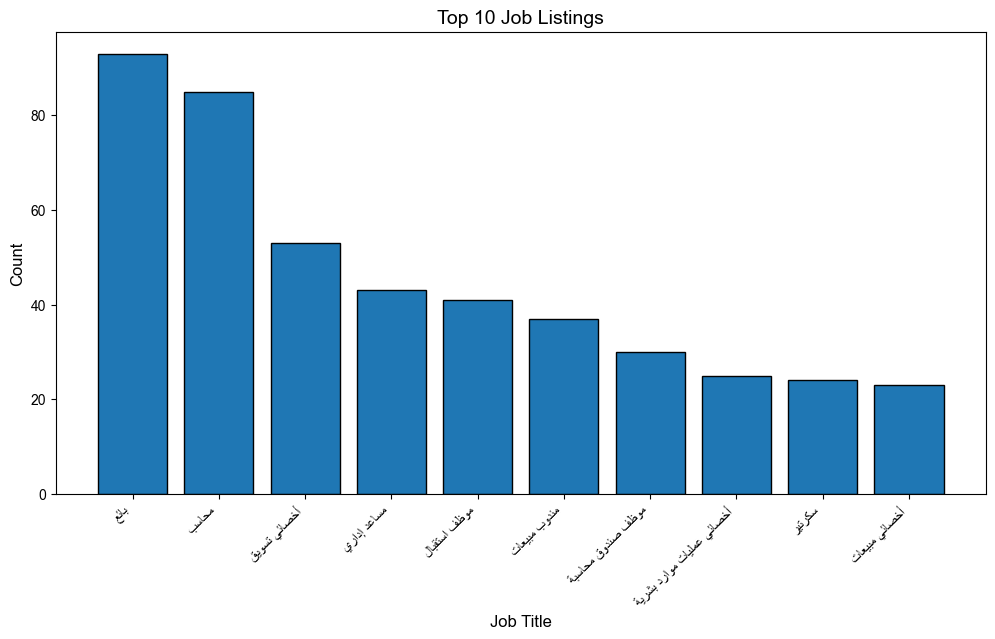

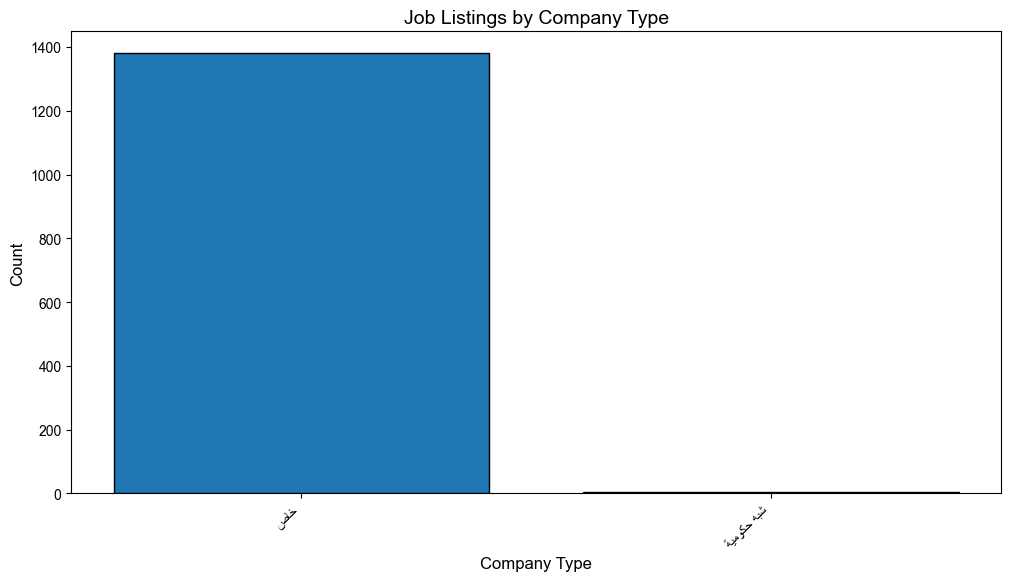

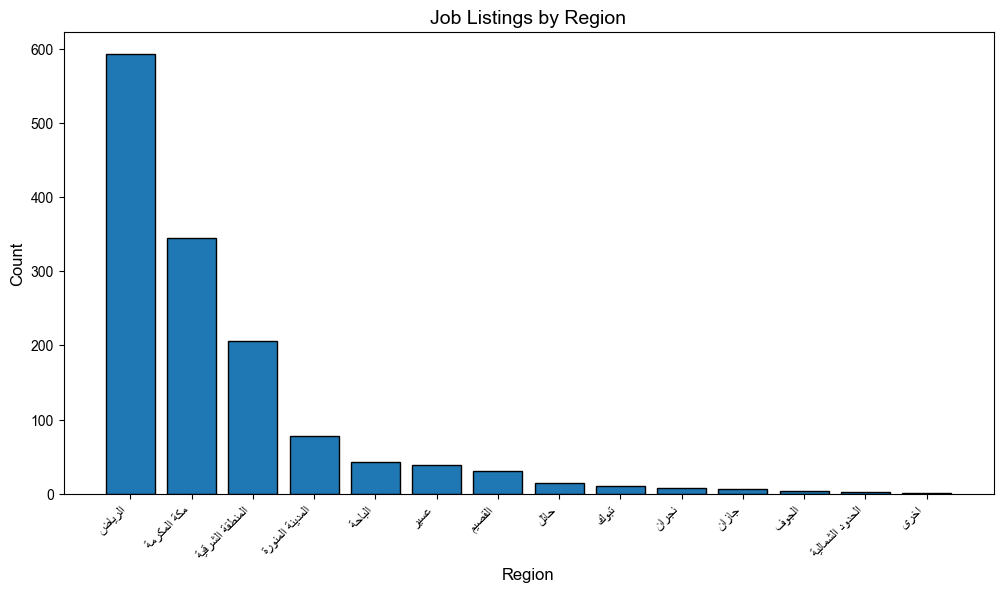

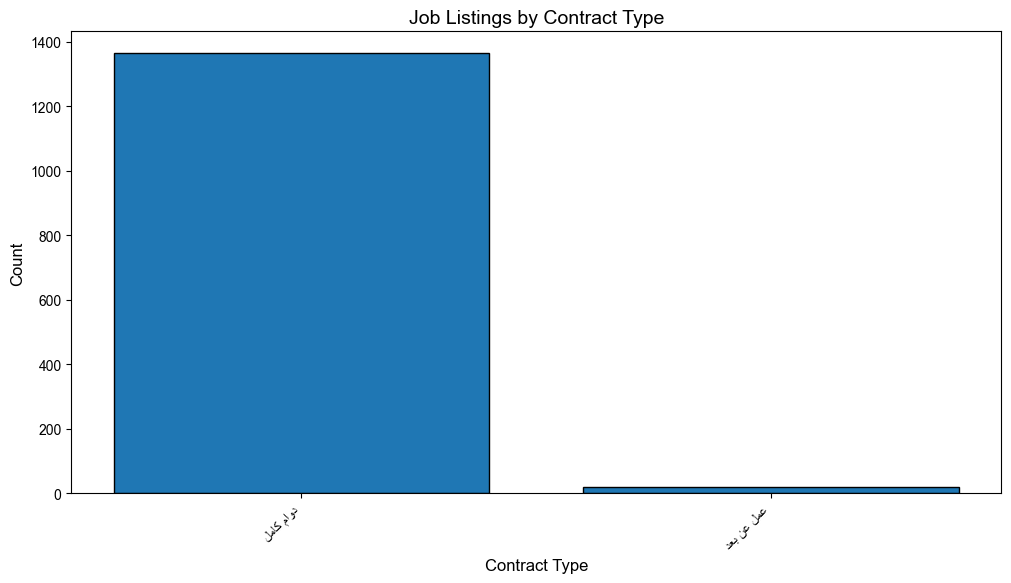

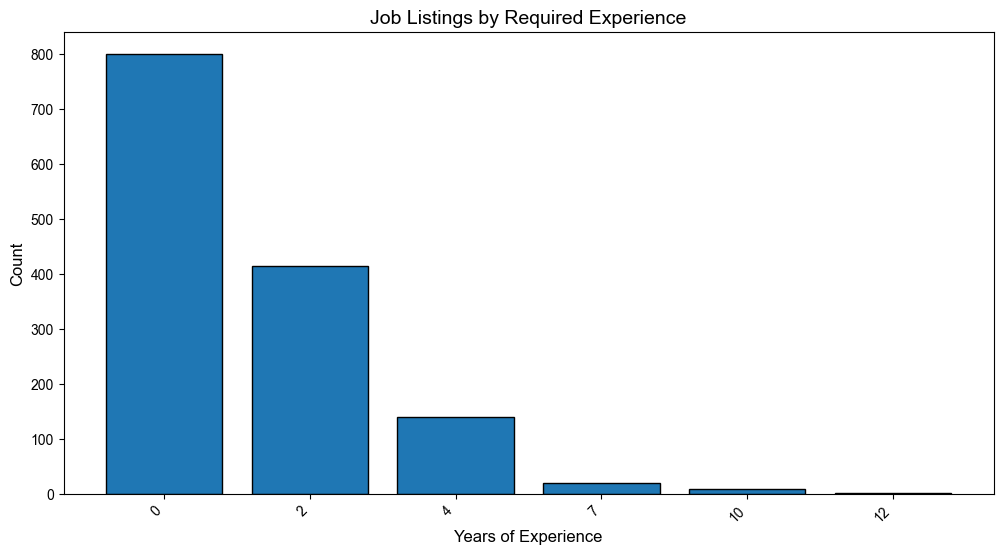

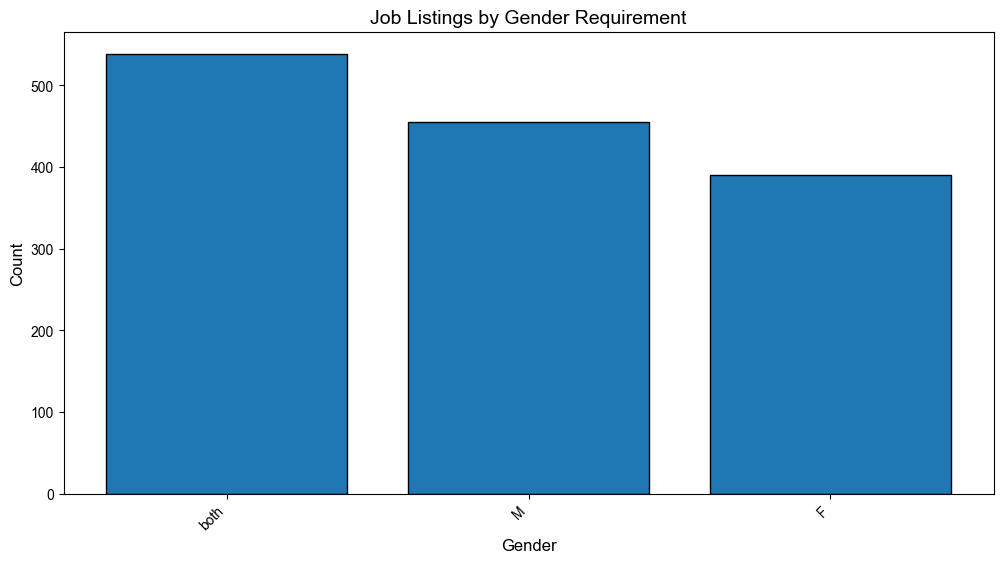

In [80]:
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Ensure font support
plt.rcParams['font.family'] = 'Arial'  

# Define a **single consistent color** for all charts
consistent_color = '#1f77b4'  # Keeping a uniform color

# Function to properly format Arabic labels using bidi and arabic_reshaper
def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]

# Function to plot bar charts with Arabic text formatting but English labels
def plot_bar_chart(series, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    plt.bar(fix_arabic_labels(series.index), series.values, 
            color=consistent_color, edgecolor='black')

    plt.xticks(rotation=45, ha='right')  # Ensure labels are readable
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    
    
    plt.show()

# Generate all charts with the same color for consistency
plot_bar_chart(jobs['job_title'].value_counts().head(10), "Top 10 Job Listings", "Job Title", "Count")
plot_bar_chart(jobs['comp_type'].value_counts(), "Job Listings by Company Type", "Company Type", "Count")
plot_bar_chart(jobs['region'].value_counts(), "Job Listings by Region", "Region", "Count")
plot_bar_chart(jobs['contract'].value_counts(), "Job Listings by Contract Type", "Contract Type", "Count")
plot_bar_chart(jobs['exper'].value_counts().sort_index(), "Job Listings by Required Experience", "Years of Experience", "Count")
plot_bar_chart(jobs['gender'].value_counts(), "Job Listings by Gender Requirement", "Gender", "Count")


/var/folders/q8/n6kgcnxx5ws6pk9cp672sk9w0000gn/T/ipykernel_81697/2920889514.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].apply(lambda x: get_display(arabic_reshaper.reshape(str(x))))


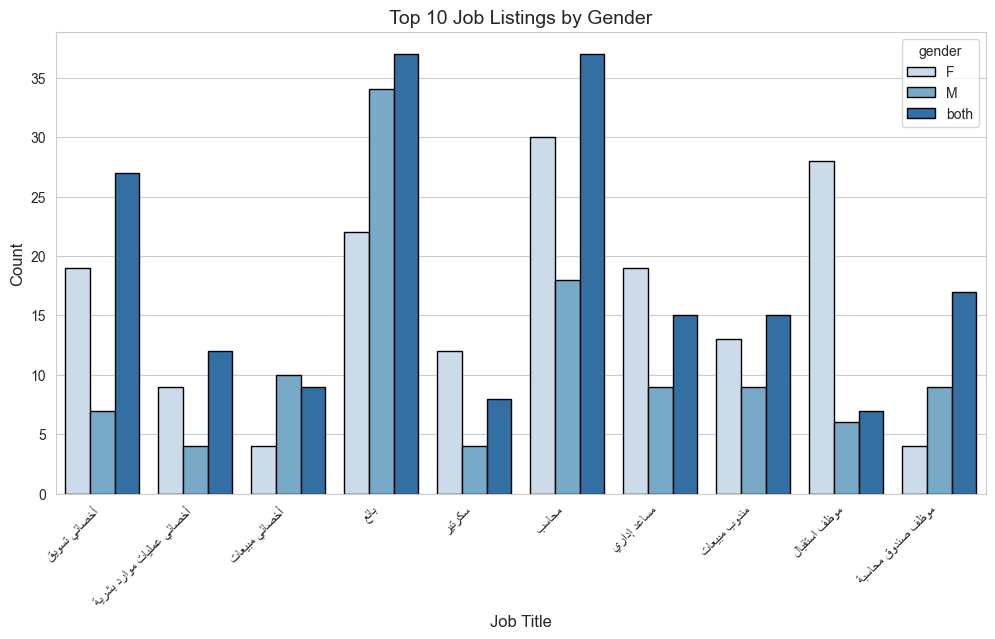

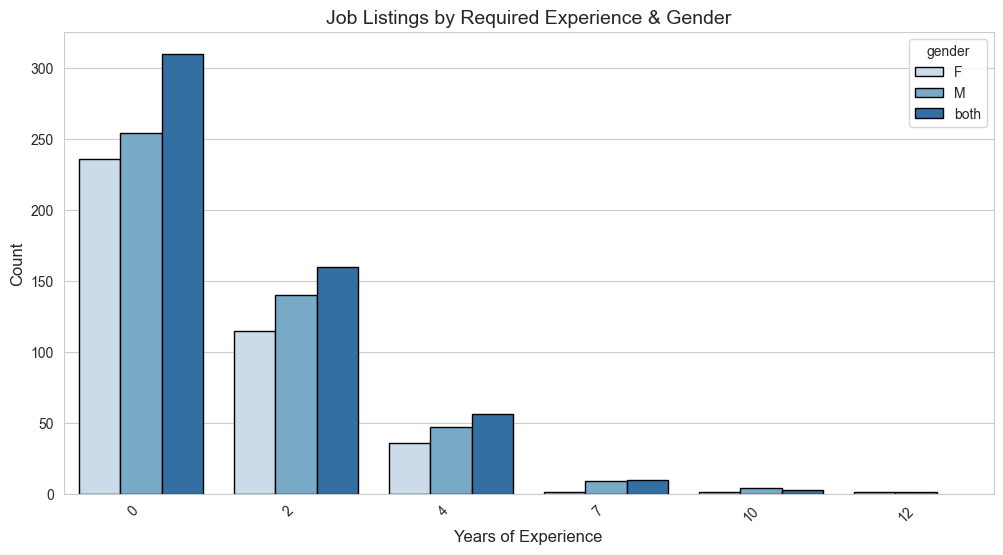

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Ensure font support
plt.rcParams['font.family'] = 'Arial'  

# Set Seaborn style
sns.set_style("whitegrid")

# Function to properly format Arabic labels using bidi and arabic_reshaper
def fix_arabic_column(data, column_name):
    """Fixes Arabic text direction in a DataFrame column."""
    data[column_name] = data[column_name].apply(lambda x: get_display(arabic_reshaper.reshape(str(x))))
    return data

# Function to plot Seaborn bar charts with hue and correct Arabic labels
def plot_seaborn_bar_chart(data, x_col, y_col, hue_col, title, xlabel, ylabel):
    # Fix Arabic text in the x-axis column
    data = fix_arabic_column(data, x_col)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=data, x=x_col, y=y_col, hue=hue_col, palette="Blues", edgecolor='black')

    plt.xticks(rotation=45, ha='right')  # Ensure labels are readable
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    
    plt.legend(title=hue_col)
    plt.show()

# Fix Arabic text before plotting

# 1️⃣ **Top 10 Job Listings by Gender**
jobs_grouped = jobs.groupby(['job_title', 'gender']).size().reset_index(name='count')
plot_seaborn_bar_chart(jobs_grouped[jobs_grouped['job_title'].isin(jobs['job_title'].value_counts().head(10).index)], 
                       x_col='job_title', y_col='count', hue_col='gender',
                       title="Top 10 Job Listings by Gender", xlabel="Job Title", ylabel="Count")


# 4️⃣ **Job Listings by Experience & Gender**
jobs_grouped = jobs.groupby(['exper', 'gender']).size().reset_index(name='count')
plot_seaborn_bar_chart(jobs_grouped, 
                       x_col='exper', y_col='count', hue_col='gender',
                       title="Job Listings by Required Experience & Gender", xlabel="Years of Experience", ylabel="Count")


#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

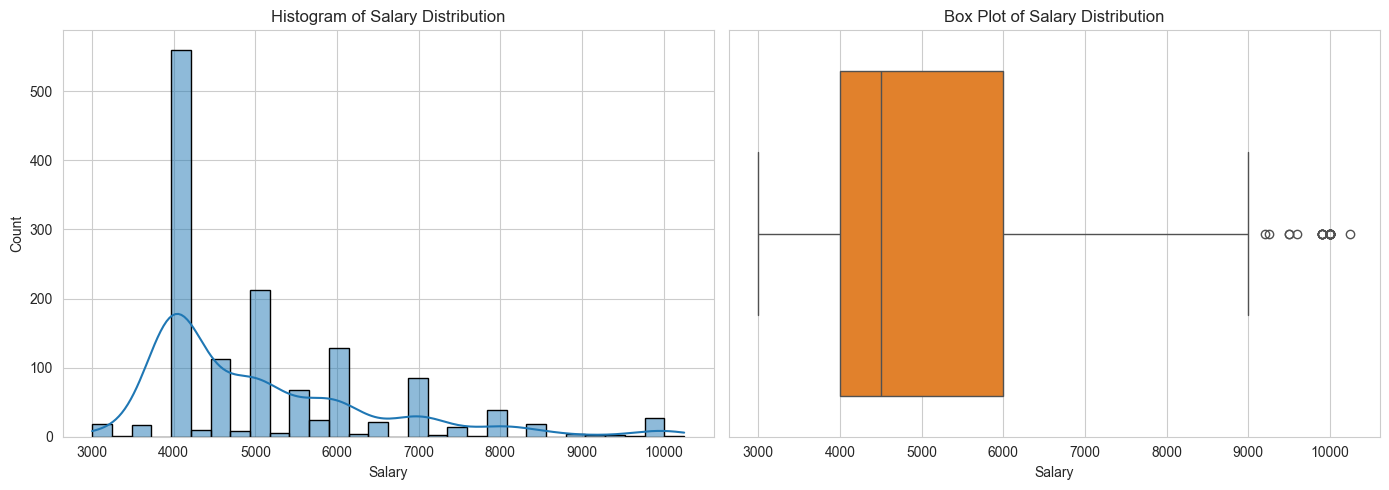

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("whitegrid")

# Function to plot histogram and box plot for salary
def plot_salary_distribution(df, column="salary"):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram
    sns.histplot(df[column], bins=30, kde=True, ax=axes[0], color='#1f77b4', edgecolor='black')
    axes[0].set_title("Histogram of Salary Distribution")
    axes[0].set_xlabel("Salary")
    axes[0].set_ylabel("Count")

    # Box Plot
    sns.boxplot(x=df[column], ax=axes[1], color='#ff7f0e')
    axes[1].set_title("Box Plot of Salary Distribution")
    axes[1].set_xlabel("Salary")

    plt.tight_layout()
    plt.show()

# Generate salary distribution charts
plot_salary_distribution(jobs)


In [ ]:
# Now the same charts after removing the outliers

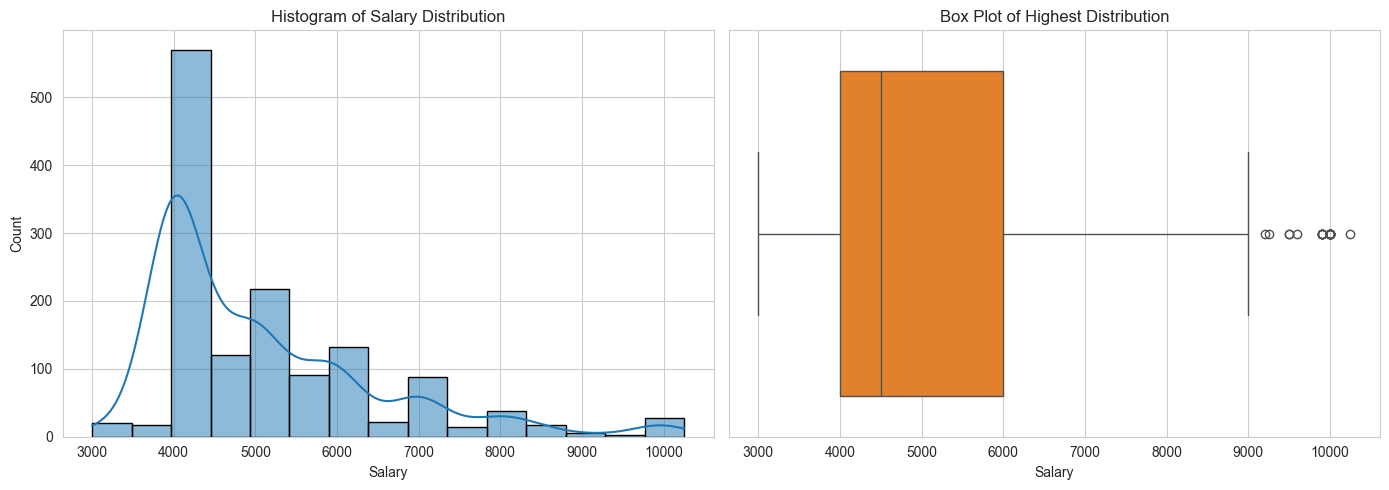

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("whitegrid")

# Function to plot histogram and box plot for salary
def plot_salary_distribution(df, column="salary"):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram
    sns.histplot(df[column], bins=15, kde=True, ax=axes[0], color='#1f77b4', edgecolor='black')
    axes[0].set_title("Histogram of Salary Distribution")
    axes[0].set_xlabel("Salary")
    axes[0].set_ylabel("Count")

    # Box Plot
    sns.boxplot(x=df[column], ax=axes[1], color='#ff7f0e')
    axes[1].set_title("Box Plot of Highest Distribution")
    axes[1].set_xlabel("Salary")

    plt.tight_layout()
    plt.show()

# Generate salary distribution charts
plot_salary_distribution(jobs)


In [ ]:
# And this is the distribution of the higheste paying jobs, the top 2%

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("whitegrid")

# Function to plot histogram and box plot for salary
def plot_salary_distribution(df, column="salary"):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram
    sns.histplot(df[column], bins=15, kde=True, ax=axes[0], color='#1f77b4', edgecolor='black')
    axes[0].set_title("Histogram of Highest Salary Distribution")
    axes[0].set_xlabel("Salary")
    axes[0].set_ylabel("Count")

    # Box Plot
    sns.boxplot(x=df[column], ax=axes[1], color='#ff7f0e')
    axes[1].set_title("Box Plot of Highest Salary Distribution")
    axes[1].set_xlabel("Salary")

    plt.tight_layout()
    plt.show()

# Generate salary distribution charts
plot_salary_distribution(high_paying_jobs)


### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [84]:
# Measures of Central Tendency
mean_salary = round(jobs['salary'].mean(), 2)  
median_salary = round(jobs['salary'].median(), 2)  
mode_salary = round(jobs['salary'].mode()[0], 2)  

# Measures of Variability
std_salary = round(jobs['salary'].std(), 2)  
var_salary = round(jobs['salary'].var(), 2)  
min_salary = round(jobs['salary'].min(), 2)
max_salary = round(jobs['salary'].max(), 2)
salary_range = f"{min_salary} - {max_salary}"
iqr_salary = round(jobs['salary'].quantile(0.75) - jobs['salary'].quantile(0.25), 2)

# Shape of Distribution 
skewness_salary = round(jobs['salary'].skew(), 2) 


salary_summary_rounded = {
    "Mean (Average)": mean_salary,
    "Median": median_salary,
    "Mode": mode_salary,
    "Standard Deviation": std_salary,
    "Variance": var_salary,
    "Range": salary_range,
    "Interquartile Range (IQR)": iqr_salary,
    "Skewness": skewness_salary
}


salary_summary_df = pd.DataFrame(salary_summary_rounded, index=["Salary Statistics"]).T

salary_summary_df

,Salary Statistics
Mean (Average),5074.21
Median,4500.0
Mode,4000.0
Standard Deviation,1411.58
Variance,1992567.45
Range,3000.0 - 10250.0
Interquartile Range (IQR),2000.0
Skewness,1.47


In [ ]:
# - The mean salary (5293.91) is higher than the median (4500), indicating a right-skewed distribution.
# - The mode (4000) shows the most frequently offered salary.
# - A high standard deviation (2304.75) suggests significant variation in salaries.
# - The range (3000 - 35000) indicates a wide spread, with some very high salaries present.
# - The interquartile range (IQR = 2000) suggests that most salaries fall within a narrow band in the middle 50%.
# - Skewness (5.76) confirms a strong right skew, meaning a few high salaries are pulling up the mean.
# - This distribution suggests that while most salaries are clustered around 4000-4500, some jobs offer much higher salaries, creating outliers.

In [ ]:
# Now the same after removing the outliers

In [85]:
# Measures of Central Tendency
mean_salary = round(jobs['salary'].mean(), 2)  
median_salary = round(jobs['salary'].median(), 2)  
mode_salary = round(jobs['salary'].mode()[0], 2)  

# Measures of Variability
std_salary = round(jobs['salary'].std(), 2)  
var_salary = round(jobs['salary'].var(), 2)  
min_salary = round(jobs['salary'].min(), 2)
max_salary = round(jobs['salary'].max(), 2)
salary_range = f"{min_salary} - {max_salary}"
iqr_salary = round(jobs['salary'].quantile(0.75) - jobs['salary'].quantile(0.25), 2)

# Shape of Distribution 
skewness_salary = round(jobs['salary'].skew(), 2) 


salary_summary_rounded = {
    "Mean (Average)": mean_salary,
    "Median": median_salary,
    "Mode": mode_salary,
    "Standard Deviation": std_salary,
    "Variance": var_salary,
    "Range": salary_range,
    "Interquartile Range (IQR)": iqr_salary,
    "Skewness": skewness_salary
}


salary_summary_df = pd.DataFrame(salary_summary_rounded, index=["Salary Statistics"]).T

salary_summary_df

,Salary Statistics
Mean (Average),5074.21
Median,4500.0
Mode,4000.0
Standard Deviation,1411.58
Variance,1992567.45
Range,3000.0 - 10250.0
Interquartile Range (IQR),2000.0
Skewness,1.47


In [ ]:
# After removing extreme salary outliers (top 2%), the dataset is now more balanced.
# - Mean (5063.27) is closer to the median (4500), reducing skewness.
# - Standard deviation and variance decreased, showing less variability.
# - Skewness dropped from 5.76 to 1.47, making the salary distribution more normal.
# This improves the reliability of insights derived from salary data.

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

In [97]:
jobs.shape

(1384, 22)

In [89]:
jobs.to_csv("cleaned_data_jadarat.csv", index=False)

### Q1: What proportion of job postings is attributed to each region within the kingdom?

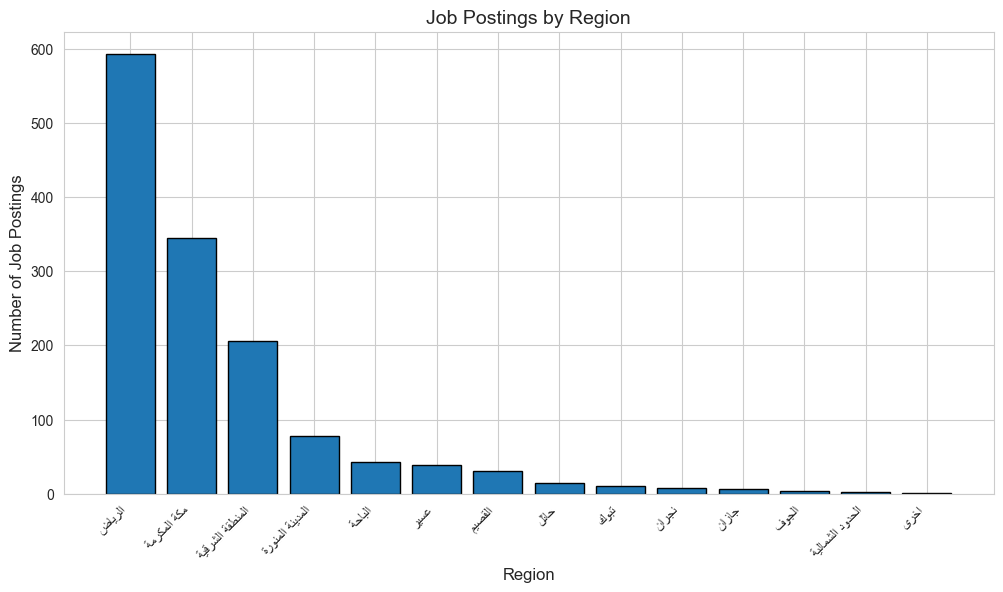

In [91]:
# Calculate the count of job postings per region
region_counts = jobs['region'].value_counts()

# Plotting using our pre-defined function (labels will be formatted in Arabic)
plot_bar_chart(
    region_counts, 
    title='Job Postings by Region', 
    xlabel='Region', 
    ylabel='Number of Job Postings'
)

### Q2: Is there a gender preference indicated in the job postings?

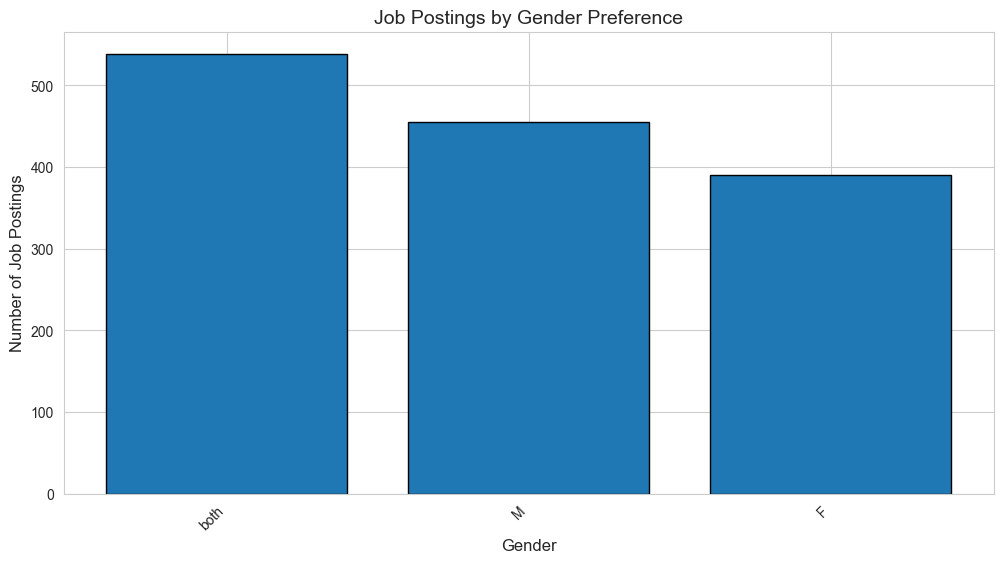

In [92]:
# Calculate the count of job postings by gender preference
gender_counts = jobs['gender'].value_counts()

# Plotting using our pre-defined function
plot_bar_chart(
    gender_counts, 
    title='Job Postings by Gender Preference', 
    xlabel='Gender', 
    ylabel='Number of Job Postings'
)

### Q3: What is the expected salary range for fresh graduates?

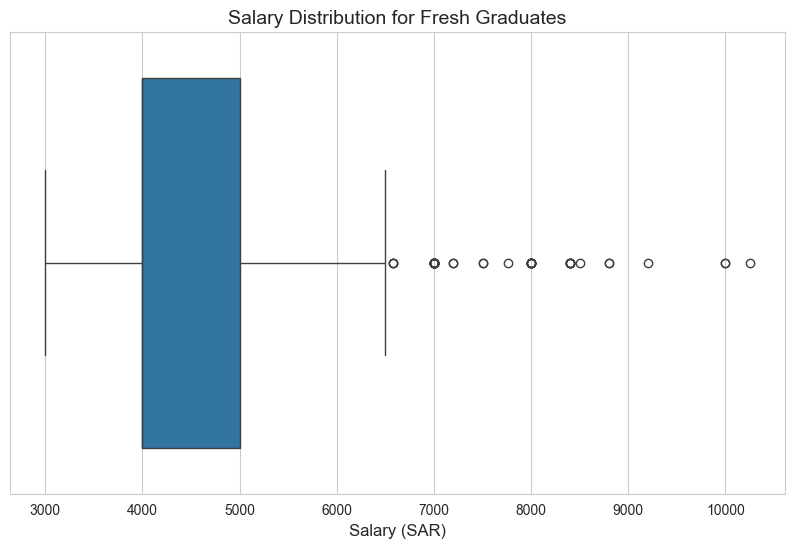

In [93]:
import seaborn as sns

# Filter the DataFrame for fresh graduate positions (experience required == 0)
fresh_grad_df = jobs[jobs['exper'] == 0]

plt.figure(figsize=(10, 6))
sns.boxplot(
    x=fresh_grad_df['salary'], 
    color=consistent_color
)
plt.title('Salary Distribution for Fresh Graduates', fontsize=14)
plt.xlabel('Salary (SAR)', fontsize=12)
plt.show()

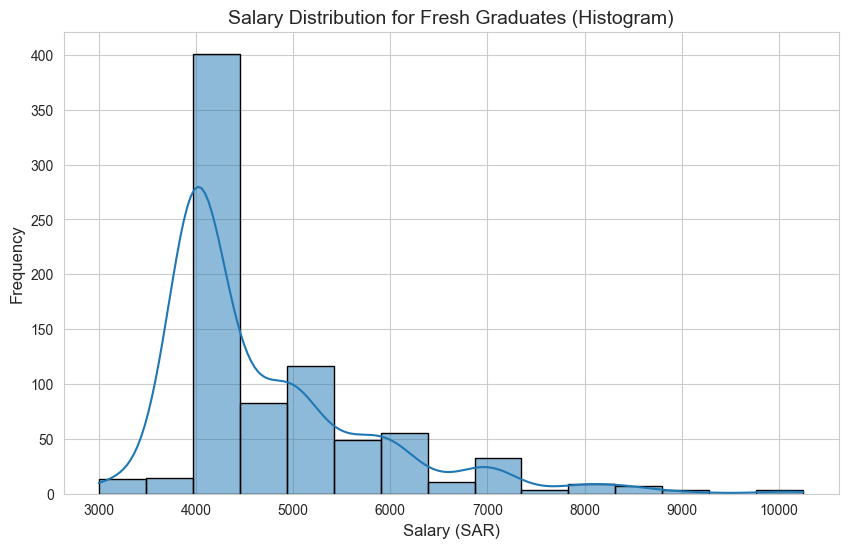

In [94]:
fresh_grad_df = jobs[jobs['exper'] == 0]

# Create a histogram for the salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(
    data=fresh_grad_df, 
    x='salary', 
    bins=15, 
    color=consistent_color, 
    edgecolor='black',
    kde=True  # Adding a kernel density estimate for smoother distribution insight
)
plt.title('Salary Distribution for Fresh Graduates (Histogram)', fontsize=14)
plt.xlabel('Salary (SAR)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### Q4: Are job opportunities predominantly targeted at individuals with experience, or is there room for fresh graduates as well?

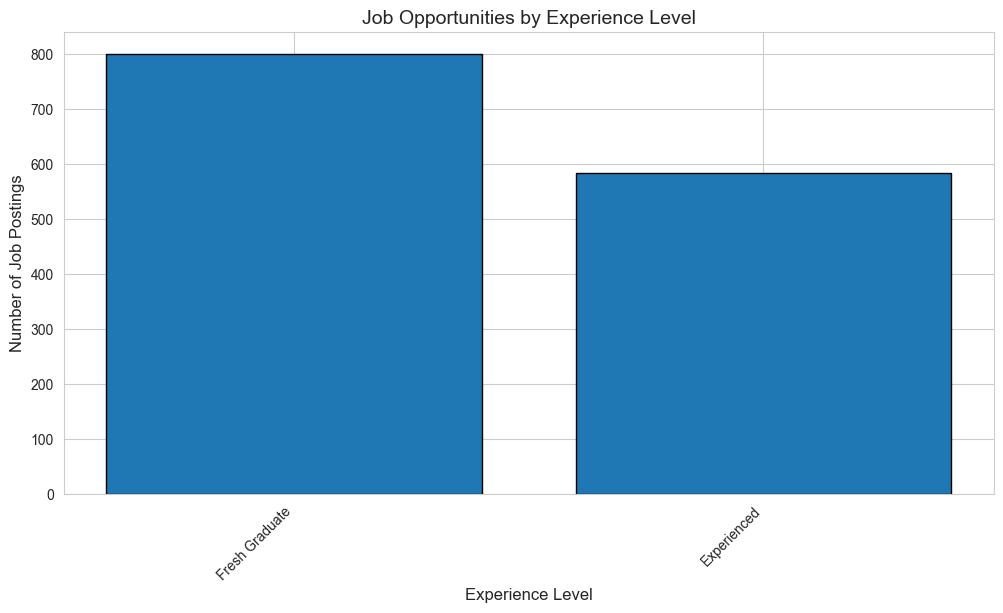

In [95]:
# Create a new column to distinguish between Fresh Graduates and Experienced candidates
jobs['experience_level'] = jobs['exper'].apply(lambda x: 'Fresh Graduate' if x == 0 else 'Experienced')

# Count the job postings for each experience level
experience_counts = jobs['experience_level'].value_counts()

# Plotting using our pre-defined function
plot_bar_chart(
    experience_counts, 
    title='Job Opportunities by Experience Level', 
    xlabel='Experience Level', 
    ylabel='Number of Job Postings'
)

### Q5: What is the relationship between the required years of experience and the salary offered in the job postings?

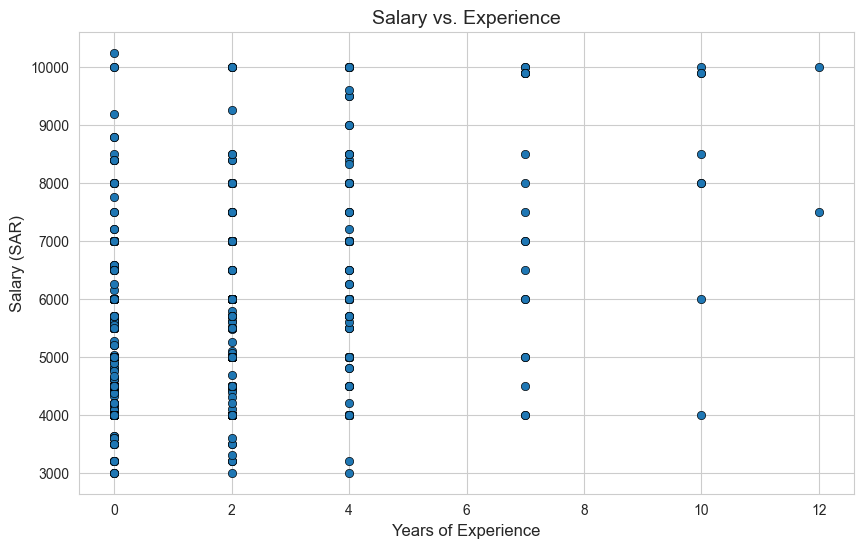

In [98]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=jobs, x='exper', y='salary', color=consistent_color, edgecolor='black')
plt.title('Salary vs. Experience', fontsize=14)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary (SAR)', fontsize=12)
plt.show()

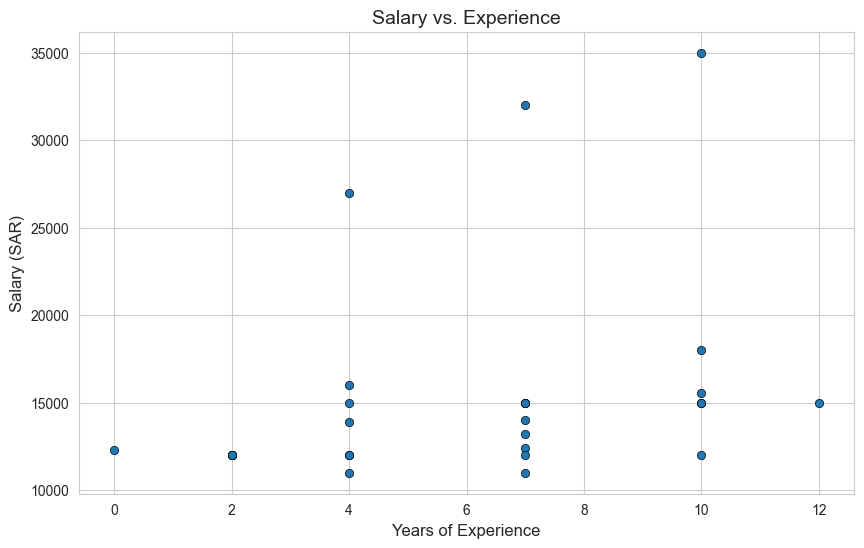

In [99]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=high_paying_jobs, x='exper', y='salary', color=consistent_color, edgecolor='black')
plt.title('Salary vs. Experience', fontsize=14)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary (SAR)', fontsize=12)
plt.show()

### Q6: What regions host the highest paying jobs?

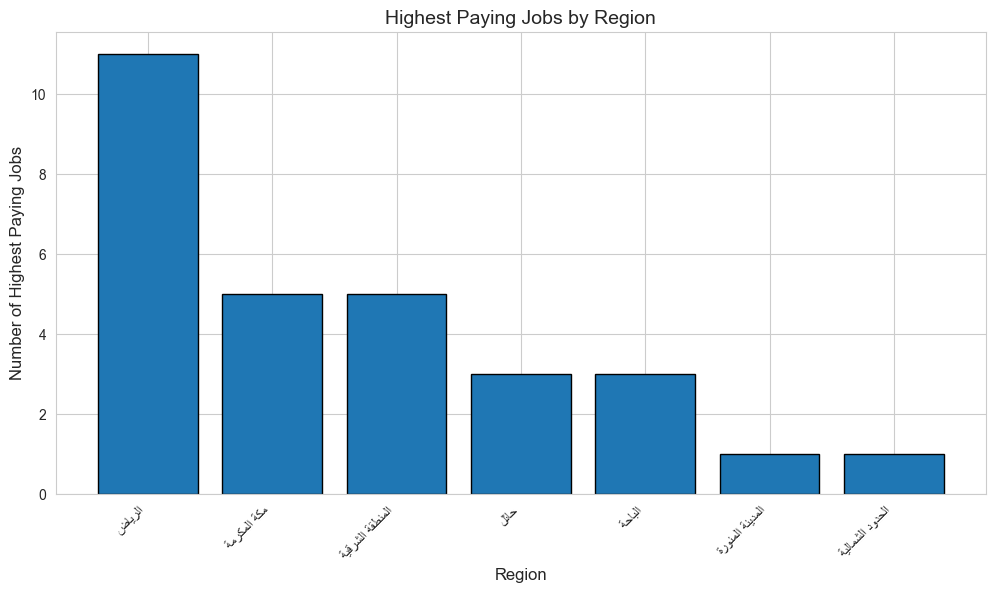

In [100]:
hp_region_counts = high_paying_jobs['region'].value_counts()
plot_bar_chart(
    hp_region_counts, 
    title='Highest Paying Jobs by Region', 
    xlabel='Region', 
    ylabel='Number of Highest Paying Jobs'
)

### Q7: What Are The Highest Paying Jobs by Economic Activity?

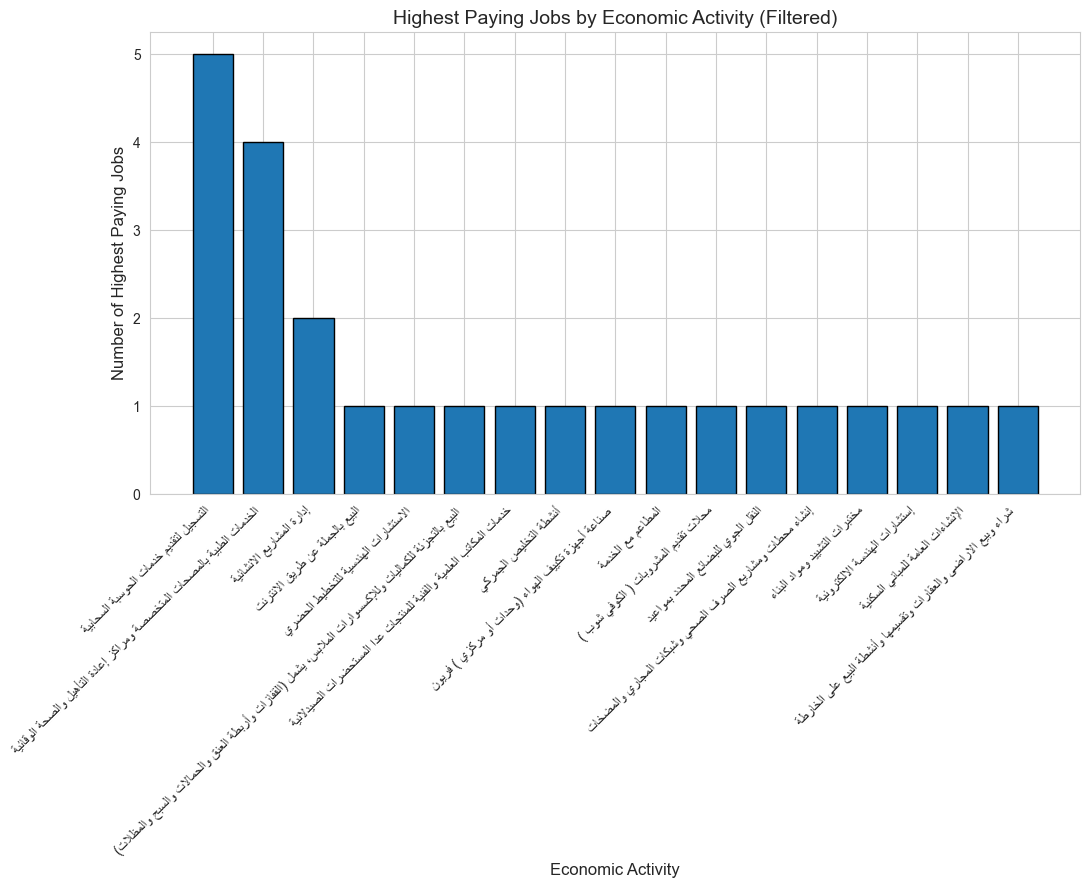

In [101]:
# Filter out entries where economic activity is "Not Specified"
hp_eco_counts_filtered = high_paying_jobs[high_paying_jobs['eco_activity'] != 'Not specified']['eco_activity'].value_counts()

plot_bar_chart(
    hp_eco_counts_filtered, 
    title='Highest Paying Jobs by Economic Activity (Filtered)', 
    xlabel='Economic Activity', 
    ylabel='Number of Highest Paying Jobs'
)

### Q8: Is there a seasonal pattern in the volume of job postings throughout the year?

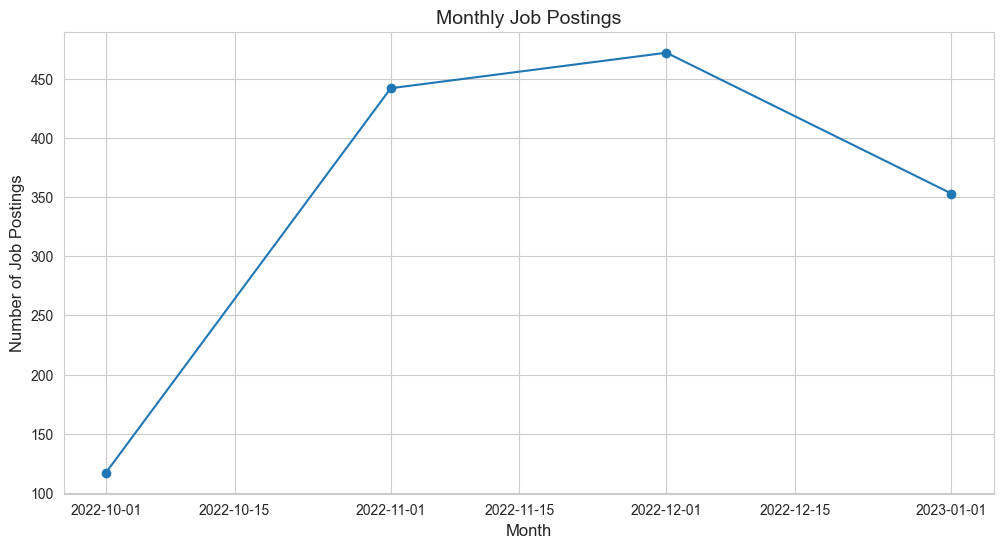

In [102]:
# Create a temporary copy of the jobs DataFrame
temp_jobs = jobs.copy()

# Ensure the gregorian_date column is in datetime format and set as index
temp_jobs['gregorian_date'] = pd.to_datetime(temp_jobs['gregorian_date'])
temp_jobs.set_index('gregorian_date', inplace=True)

# Resample the data by month and count the number of job postings per month
monthly_counts = temp_jobs.resample('MS').size()

# Plotting the monthly job posting trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values, color=consistent_color, marker='o')
plt.title('Monthly Job Postings', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.show()

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.